<a href="https://colab.research.google.com/github/rtajeong/M4_new/blob/main/lab_05_keras_intro_rev3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras
- The core data structures of Keras are **layers** and **models**.
- models:
  - sequential model (linear stack of layers)
  - functional API model
- from https://keras.io/guides/functional_api/

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input

# Models and Layers
- Layer: inner computation block
- Model: define the outer model

## Layers in Keras
- A layer encapsulates both:
  - a state (the layer's "weights") and
  - a transformation from inputs to outputs (a "call", the layer's forward pass)
  

## Models and Layers examples
- Input() : used to instantiate a Keras tensor (Keras tensor: a symbolic tensor-like object, which we augment with certain attributes)
- Dense, Flatten, Conv2D, SimpleRNN, ...

In [ ]:
# 784-dimensional vector input (flattened)
inputs = Input(shape=(784,))   # 784-dimensional vector. The batch size is always omitted
                               # since only the shape of each sample is specified.
# image input
img_inputs = Input(shape=(32, 32, 3))

In [ ]:
inputs.shape, img_inputs.shape, inputs.dtype, img_inputs.dtype

(TensorShape([None, 784]),
 TensorShape([None, 32, 32, 3]),
 tf.float32,
 tf.float32)

In [ ]:
# input
inputs = Input(shape=(784,))
# create a new node in the graph of layers
dense = layers.Dense(64, activation="relu")
x = dense(inputs)
# few more layers
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

In [ ]:
type(outputs), type(inputs)

(keras.engine.keras_tensor.KerasTensor, keras.engine.keras_tensor.KerasTensor)

In [ ]:
# create Model (should begin with Input() layer)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [ ]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


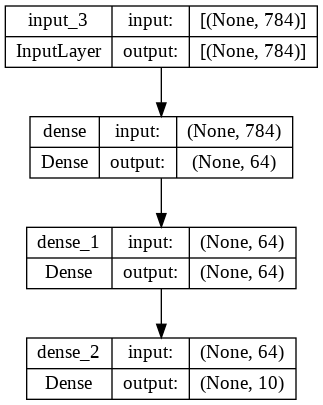

In [ ]:
keras.utils.plot_model(model, "my_first_model.png", show_shapes=True)

## using Sequential API

In [ ]:
# Sequential API
model = Sequential()
model.add(Dense(64, input_shape=(784,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


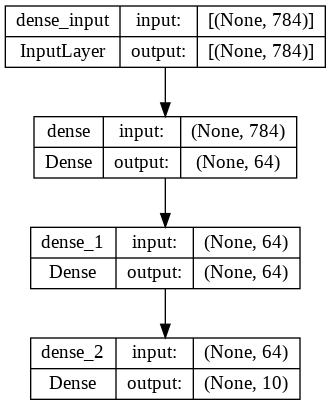

In [ ]:
# plot the model

keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

## using Functional API

In [ ]:
inputs = Input(shape=(784,))
x = Dense(64, activation="relu")(inputs)
x = Dense(64, activation="relu")(x)
outputs = Dense(10)(x)

In [ ]:
# create a Model
model = Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# no of parameters to train
# 784 * 64 + 64 = 50240
# 64 * 64 + 64 = 4160
# 64 * 10 + 10 = 650

# Training, evaluation, and Inference

---
- try to use Sequential() model, with MNIST dataset

In [ ]:
from tensorflow.keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [ ]:

x_train = x_train.reshape(60000, 784).astype("float32") / 255.
x_test = x_test.reshape(10000, 784).astype("float32") / 255.

In [ ]:
# one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [ ]:
model.compile(
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)
# from_logits=True: inform the loss function that the output values generated by the model
# are not normalized, a.k.a. logits. (i.e. softmax function has not been applied on them)
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/5
480/480 [==============================] - 4s 4ms/step - loss: 0.4155 - accuracy: 0.8797 - val_loss: 0.2086 - val_accuracy: 0.9408
Epoch 2/5
480/480 [==============================] - 2s 3ms/step - loss: 0.1793 - accuracy: 0.9473 - val_loss: 0.1481 - val_accuracy: 0.9577
Epoch 3/5
480/480 [==============================] - 2s 3ms/step - loss: 0.1306 - accuracy: 0.9622 - val_loss: 0.1296 - val_accuracy: 0.9607
Epoch 4/5
480/480 [==============================] - 2s 3ms/step - loss: 0.1030 - accuracy: 0.9695 - val_loss: 0.1107 - val_accuracy: 0.9668
Epoch 5/5
480/480 [==============================] - 2s 3ms/step - loss: 0.0833 - accuracy: 0.9747 - val_loss: 0.1106 - val_accuracy: 0.9669
313/313 - 1s - loss: 0.1045 - accuracy: 0.9681 - 672ms/epoch - 2ms/step
Test loss: 0.1045040562748909
Test accuracy: 0.9681000113487244


- we can see that size(train)=60000*0.8=48000 (480 steps/epoch)
- and size(val) = 60000*0.2=12000

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Save the model
---

- There are two different types of saving models
  - Tensorflow SavedModel (recommended)
    - model architecture
    - model weight values (that were learned during training)
    - model training config, if any (as passed to compile)
    - optimizer and its state, if any (to restart training where you left off)
  - previous keras H5 (simplified version)
  - for more information: see https://www.tensorflow.org/guide/keras/save_and_serialize?hl=ko

In [ ]:
# method 1: savedmodel type
model.save("path_to_my_model")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("path_to_my_model")

In [ ]:
# method 2: h5 type
model.save("my_model.h5")
del model
model = keras.models.load_model("my_model.h5")

# To define multiple models
- a single graph of layers can be used to generate multiple models

In [ ]:
encoder_input = Input(shape=(28, 28, 1), name="img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)
            # (batch_size, rows, columns, channels)->(batch_size, channels)

encoder = Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          4624      
                                                           

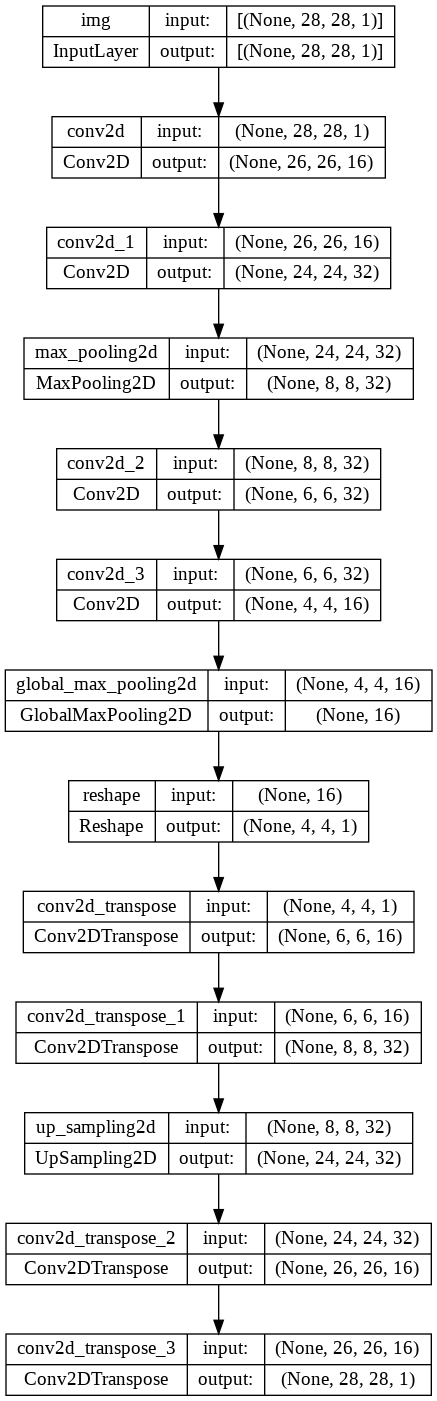

In [ ]:
keras.utils.plot_model(autoencoder, "my_autoencoder_info.png", show_shapes=True)

## All models are callable, just like layers
---

In [ ]:
encoder_input = Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)  # pool size equals to the size of the input

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)              # model called
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 original_img (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          4624      
                                                           

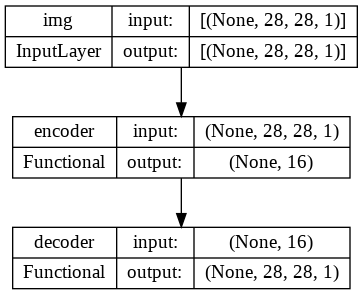

In [ ]:
keras.utils.plot_model(autoencoder, "my_second_autoencoder_info.png", show_shapes=True)

# Backend operation
- keras is a model-level library, so does not have low-level operations, such as tensor products, convolutions, so on.
- It uses Backend library for low-level functions.

In [ ]:
!echo $HOME

/root


In [ ]:
!ls -a /root

.   .bashrc  .config   .jupyter  .local  .nv	   .tmux.conf
..  .cache   .ipython  .keras	 .npm	 .profile  .wget-hsts


In [ ]:
!more $HOME/.keras/keras.json   # backend (for low level functions) is tensorflow
                                # among Tensorflow, Theano, CNTK

{
    "floatx": "float32",
    "epsilon": 1e-07,
    "backend": "tensorflow",
    "image_data_format": "channels_last"
}


In [ ]:
from tensorflow.keras import backend as K
a = K.constant([[1,-1],[-1,0]], dtype=tf.float32, shape=[2,2])
K.dot(a, K.transpose(a))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 2., -1.],
       [-1.,  1.]], dtype=float32)>

In [ ]:
np.random.normal(0, 1, size=(2,2))

array([[ 1.26933849,  1.35552576],
       [-1.61229419, -0.77590633]])

In [ ]:
tf.ones((2,2,2)), K.ones((2,2,2))

(<tf.Tensor: shape=(2, 2, 2), dtype=float32, numpy=
 array([[[1., 1.],
         [1., 1.]],
 
        [[1., 1.],
         [1., 1.]]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(2, 2, 2) dtype=float32, numpy=
 array([[[1., 1.],
         [1., 1.]],
 
        [[1., 1.],
         [1., 1.]]], dtype=float32)>)

In [ ]:
type(tf.ones((2,2,2))), type(K.ones((2,2,2)))

(tensorflow.python.framework.ops.EagerTensor,
 tensorflow.python.ops.resource_variable_ops.ResourceVariable)

In [ ]:
x1 = K.placeholder((1,2))
x2 = K.variable((1,2))
x1, x2

(<KerasTensor: shape=(1, 2) dtype=float32 (created by layer 'input_5')>,
 <tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([1., 2.], dtype=float32)>)

In [ ]:
val = np.random.normal(loc=[1, 10, 100])  # mean = [1, 10, 100] ( 3 samples)
var = K.variable(value=val)

var_0 = K.zeros(shape=(2, 2, 2))
var_1 = K.ones(shape=(2, 2, 2))
val, var, var_0, var_1

(array([ 1.84601188,  9.46178003, 99.92954778]),
 <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([ 1.8460119,  9.46178  , 99.92955  ], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(2, 2, 2) dtype=float32, numpy=
 array([[[0., 0.],
         [0., 0.]],
 
        [[0., 0.],
         [0., 0.]]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(2, 2, 2) dtype=float32, numpy=
 array([[[1., 1.],
         [1., 1.]],
 
        [[1., 1.],
         [1., 1.]]], dtype=float32)>)

In [ ]:
# Initializing Tensors with Random Numbers (same as tf.Variable)
b = K.random_uniform_variable(shape=(2,2), low=0, high=1) # Uniform distribution
c = K.random_normal_variable(shape=(2,2), mean=0, scale=1) # Gaussian distribution
print(b, '\n', c)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.14035296, 0.9262835 ],
       [0.3613503 , 0.25074136]], dtype=float32)> 
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.79279304, 0.17463493],
       [0.46692005, 1.6920978 ]], dtype=float32)>


In [ ]:
tf.random.set_seed(1)
var1 = tf.Variable(tf.random.normal(shape=(2,2)))
tf.random.set_seed(1)
var2 = K.variable(tf.random.normal(shape=(2,2)))
var1, var2

(<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
 array([[-1.1012203 ,  1.5457517 ],
        [ 0.383644  , -0.87965786]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
 array([[-1.1012203 ,  1.5457517 ],
        [ 0.383644  , -0.87965786]], dtype=float32)>)

In [ ]:
a, b, c

(<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[ 1., -1.],
        [-1.,  0.]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
 array([[0.14035296, 0.9262835 ],
        [0.3613503 , 0.25074136]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
 array([[0.79279304, 0.17463493],
        [0.46692005, 1.6920978 ]], dtype=float32)>)

In [ ]:
# Tensor Arithmetic
b + c * K.abs(a)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.933146  , 1.1009184 ],
       [0.8282703 , 0.25074136]], dtype=float32)>

In [ ]:
K.dot(a, K.transpose(b))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.7859305 ,  0.11060894],
       [-0.14035296, -0.3613503 ]], dtype=float32)>

In [ ]:
K.sum(b, axis=1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.0666364 , 0.61209166], dtype=float32)>

In [ ]:
K.softmax(b)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.31304312, 0.6869568 ],
       [0.5276241 , 0.47237593]], dtype=float32)>

In [ ]:
K.concatenate([b, c], axis=-1)

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[0.14035296, 0.9262835 , 0.79279304, 0.17463493],
       [0.3613503 , 0.25074136, 0.46692005, 1.6920978 ]], dtype=float32)>

In [ ]:
K.prod(a, axis=1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-1., -0.], dtype=float32)>

In [ ]:
# K.shape(), K.ndim(), K.dtype(), K.eval(), K.zeros(), K.ones(),
# K.eye(), K.zeros_like(), K.ones_like(), K.cast(), K.update(),
# K.update_add(), K.update_sub(), K.dot(), K.batch_dot(), K.transpose(),
# K.{max(),min(), sum()}, K.cumsum(), K.cumprod(), K.std(), K.mean(),
# any, all, argmax, argmin, square, abs, sqrt, exp, log, round, sign, pow,
# clip, equal, not_equal, greater, reshape, resize_images, ...

- For detailed information, please refer to https://keras.io/ko/backend/

# Simple Examples
- https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/

## Classification

In [ ]:
# example of training a final classification model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# define and fit the final model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X, y, epochs=200, verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


- prediction: two types
  - class prediction
  - probability prediction

In [ ]:
# predict the result for a new data Xnew
Xnew, _ = make_blobs(n_samples=3, centers=2, n_features=2, random_state=1)
Xnew = scaler.transform(Xnew)

# make a prediction for probability
print('Probability...')
ynew = model.predict(Xnew)
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

Probability...
1/1 [==============================] - 0s 73ms/step
X=[0.89337759 0.65864154], Predicted=[0.02137442]
X=[0.29097707 0.12978982], Predicted=[0.6738383]
X=[0.78082614 0.75391697], Predicted=[0.02613115]


In [ ]:
# make a prediction for classes
ynew = (model.predict(Xnew) > 0.5).astype("int32")
# show the inputs and predicted outputs
print('Classes...')
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

1/1 [==============================] - 0s 16ms/step
Classes...
X=[0.89337759 0.65864154], Predicted=[0]
X=[0.29097707 0.12978982], Predicted=[1]
X=[0.78082614 0.75391697], Predicted=[0]


## Regression

In [ ]:
# with scaling target values
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

X, y = make_regression(n_samples=100, n_features=2, noise=0.05, random_state=1)
scalerX, scalerY = StandardScaler(), StandardScaler()
scalerX.fit(X)
scalerY.fit(y.reshape(100,1))   # (100,) -> (100,1)
X = scalerX.transform(X)
y = scalerY.transform(y.reshape(100,1))

# define and fit the final model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()
model.compile(loss='mse', optimizer='adam')
model.fit(X, y, epochs=1000, verbose=0)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 12        
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# new instances to predict
Xnew, a = make_regression(n_samples=3, n_features=2, noise=0.05, random_state=7)
Xnew = scalerX.transform(Xnew)
ynew = model.predict(Xnew)

for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

1/1 [==============================] - 0s 40ms/step
X=[0.04887696 0.21052199], Predicted=[0.22350478]
X=[ 1.80651612 -0.80617796], Predicted=[-0.06484175]
X=[-0.82240444 -0.26142258], Predicted=[-0.5832653]


In [ ]:
model(Xnew)            # -> tensor

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[ 0.22350478],
       [-0.06484175],
       [-0.5832653 ]], dtype=float32)>

In [ ]:
model.predict(Xnew)    # -> array (result is the same as the above)

1/1 [==============================] - 0s 17ms/step


array([[ 0.22350478],
       [-0.06484175],
       [-0.5832653 ]], dtype=float32)

In [ ]:
# to compare with the real value
import pandas as pd
res = np.concatenate([scalerY.inverse_transform(ynew), a.reshape(-1,1)], axis=1)
pd.DataFrame(res, columns=["predicted", "real"])

,predicted,real
0,36.189922,21.282072
1,14.227161,22.139789
2,-25.260094,-21.105786


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error (a, scalerY.inverse_transform(ynew))

100.70398111466459

In [ ]:
# without target scaling

X, y = make_regression(n_samples=100, n_features=2, noise=0.05, random_state=1)
scalerX = StandardScaler()
X = scalerX.fit_transform(X)

# define and fit the final model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')
model.fit(X, y, epochs=1000, verbose=0)

Xnew, a = make_regression(n_samples=3, n_features=2, noise=0.05, random_state=7)
Xnew = scalerX.transform(Xnew)
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

1/1 [==============================] - 0s 50ms/step
X=[0.04887696 0.21052199], Predicted=[40.986168]
X=[ 1.80651612 -0.80617796], Predicted=[14.949879]
X=[-0.82240444 -0.26142258], Predicted=[-30.451675]


In [ ]:
mean_squared_error (a, ynew) # worse

175.76394863528034

- linear regression

In [ ]:
# linear regression
from sklearn.linear_model import LinearRegression
X, y = make_regression(n_samples=100, n_features=2, noise=0.05, random_state=1)
scalerX = StandardScaler()
X = scalerX.fit_transform(X)

lin_model = LinearRegression()
lin_model.fit(X, y)

Xnew, a = make_regression(n_samples=3, n_features=2, noise=0.05, random_state=7)
Xnew = scalerX.transform(Xnew)

lin_model.predict(Xnew), a, Xnew

(array([ 36.28583995,  14.27272315, -25.27107631]),
 array([ 21.28207192,  22.13978868, -21.10578639]),
 array([[ 0.04887696,  0.21052199],
        [ 1.80651612, -0.80617796],
        [-0.82240444, -0.26142258]]))

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error (a, lin_model.predict(Xnew))

101.45113838813302

# How to create a new layer in Keras
- keras.layers.Layer
  - the class from which all layers inherit
  - It involves *computation*, defined in the `call()` method, and a weights.
- The weights can be defined in two ways:
  - by using add_weight()
  - by overriding build() : more flexible

In [1]:
import tensorflow as tf
from tensorflow import keras

In [7]:
## Example: the method `add_weight()` offers a shortcut to create weights

class SimpleDense(keras.layers.Layer):
    def __init__(self, units=32, input_dim=32):
        super().__init__()
        self.w = self.add_weight(shape=(input_dim, units), initializer="random_normal", trainable=True)
        self.b = self.add_weight(shape=(units,), initializer="zeros", trainable=True)

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [3]:
x = tf.ones((2, 2))
linear_layer = SimpleDense(4, 2)
y = linear_layer(x)
print(y)

tf.Tensor(
[[-0.10439834  0.03569607  0.01954598  0.12038393]
 [-0.10439834  0.03569607  0.01954598  0.12038393]], shape=(2, 4), dtype=float32)


In [4]:
# Note that the weights w and b are automatically tracked by the layer upon being set as layer attributes:
assert linear_layer.weights == [linear_layer.w, linear_layer.b]

In [5]:
linear_layer.weights

[<tf.Variable 'Variable:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.04363282, -0.02870215, -0.03423524,  0.07269221],
        [-0.06076552,  0.06439822,  0.05378122,  0.04769173]],
       dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]

- Or, you can also use build() function
  - The build method is typically used to define the weights of a layer when the shapes of the inputs to that layer are known and fixed.
  - It is called automatically by Keras the first time the layer is used, before any forward pass. Inside the build method, you can create and initialize the layer's weights based on the input shapes.

In [9]:
class SimpleDense2(keras.layers.Layer):
    def __init__(self, units=32, input_dim=32):
        super().__init__()
        self.units = units
        self.input_dim = input_dim

    def build(self, input_shape):
        # self.w = self.add_weight(shape=(input_shape[-1], self.units), initializer="random_normal", trainable=True)
        self.w = self.add_weight(shape=(self.input_dim, self.units), initializer="random_normal", trainable=True)
        self.b = self.add_weight(shape=(self.units,), initializer="zeros", trainable=True)

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

x = tf.ones((2, 2))
linear_layer = SimpleDense2(4, 2)
y = linear_layer(x)
print(y)

tf.Tensor(
[[-0.1149549  -0.02561187  0.03960225  0.02817338]
 [-0.1149549  -0.02561187  0.03960225  0.02817338]], shape=(2, 4), dtype=float32)


In [10]:
linear_layer.weights, linear_layer.w, linear_layer.b

([<tf.Variable 'simple_dense2_2/Variable:0' shape=(2, 4) dtype=float32, numpy=
  array([[-0.08081984, -0.03624277,  0.02606298, -0.02874166],
         [-0.03413507,  0.0106309 ,  0.01353927,  0.05691503]],
        dtype=float32)>,
  <tf.Variable 'simple_dense2_2/Variable:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>],
 <tf.Variable 'simple_dense2_2/Variable:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.08081984, -0.03624277,  0.02606298, -0.02874166],
        [-0.03413507,  0.0106309 ,  0.01353927,  0.05691503]],
       dtype=float32)>,
 <tf.Variable 'simple_dense2_2/Variable:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>)

# Exercise

## cross entropy (softmax)

In [11]:
import numpy as np

In [13]:
# softmax and (categorical) cross entropy - for multi classes

y = np.array([0., 0., 1.])
y_hat = np.array([-0.8, 0.1, 3.5])

sm = np.exp(y_hat)/np.exp(y_hat).sum()  # softmax
print(sm)

ce = - (y * np.log(sm)).sum() # softmax cross entropy
print(ce)

[0.01296018 0.03187691 0.95516291]
0.04587337062429689


In [25]:
from tensorflow.keras.losses import CategoricalCrossentropy

cce2 = CategoricalCrossentropy(from_logits = False) # default (확률로 변환된 값)
cce2(y, y_hat).numpy()

1.0000000494736474e-07

In [26]:
# from_logits=True ?
# 보통은 사용안함. 특별히 마지막 레이어의 값을 logit 으로 keep 하고 싶은 경우 사용
# 다음 함수는 negative value 인 경우 내부적으로 computational stability 를 고려함.

cce1 = CategoricalCrossentropy(from_logits = True) # 확률로 변환되기 전 값
cce1(y, y_hat).numpy()

0.045873370624296736

In [33]:
- (y * np.log(y_hat)).sum()  # invalid (negative) values in the logit

<ipython-input-33-2b95bc4f6216>:1: RuntimeWarning: invalid value encountered in log
  - (y * np.log(y_hat)).sum()  # invalid (negative) values in the logit


nan

In [34]:
# use the following function, instead

tf.nn.softmax_cross_entropy_with_logits(y, y_hat)

<tf.Tensor: shape=(), dtype=float64, numpy=0.045873370624296736>

In [37]:
cce1 = CategoricalCrossentropy(from_logits = True)
cce2 = CategoricalCrossentropy(from_logits = False) # default

y = tf.constant([[1., 0., 0.],
                 [0., 1., 0.],
                 [0., 0., 1.]] )
y_hat = tf.constant([[.1, .8, .1],   # 이미 확률값으로 주어짐 (0~1)
                     [.2, .7, .1],
                     [.5, .3, .2]])

loss1 = cce1(y, y_hat)
loss2 = cce2(y, y_hat)

print(loss1.numpy(), loss2.numpy())

1.1325024 1.4228992


## keras text preprocessing
- text_to_word_sequence(): automatically does 3 things
  - Splits words by space (split=' ')   
  - Filters out punctuation (filters=’!”#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n’)
  - Converts text to lowercase (lower=True)

- one-hot encoding:
  - one_hot() in keras: word hashing (not a real one-hot encoding function)
  - to_categorical() in keras: one-hot encoding
  - one_hot() in tf : one-hot encoding

In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical  # one-hot encoding

In [38]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence, Tokenizer

text = 'The quick brown fox jumped -- ~ ! , , over the lazy Dog.'
text_to_word_sequence(text)

['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']

In [43]:
from tensorflow.keras.preprocessing.text import one_hot

words = set(text_to_word_sequence(text))
vocab_size = len(words)
print(vocab_size)
# integer encode the document
one_hot(text, n=vocab_size)   # integer encoding

8


[7, 2, 2, 6, 4, 1, 7, 3, 7]

In [44]:
to_categorical(one_hot(text, n=vocab_size))  # one-hot encoding

array([[0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

- using Tokenizer()

In [45]:
t = Tokenizer()
t.fit_on_texts([text])
t.word_index

{'the': 1,
 'quick': 2,
 'brown': 3,
 'fox': 4,
 'jumped': 5,
 'over': 6,
 'lazy': 7,
 'dog': 8}

In [46]:
encoded = t.texts_to_sequences([text])[0]    # integer sequence
encoded

[1, 2, 3, 4, 5, 6, 1, 7, 8]

In [47]:
to_categorical(encoded)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

- categorical encoding layer

In [48]:
# categorical encoding layer
y = [1, 2, 3, 2, 1]
layer = tf.keras.layers.CategoryEncoding(num_tokens=4, output_mode="one_hot")
layer(y)

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]], dtype=float32)>

- tf.one_hot and keras.utils.to_categorical
  - basically the same except that you give depth n in tf.one_hot()
  - returns array and tensor

In [51]:
y = [1, 2, 3, 2, 1]
tf.keras.utils.to_categorical(y)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [52]:
print(tf.one_hot(y, 2))
print(tf.one_hot(y, 4))
print(tf.one_hot(y, 6))

tf.Tensor(
[[0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]], shape=(5, 2), dtype=float32)
tf.Tensor(
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]], shape=(5, 4), dtype=float32)
tf.Tensor(
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]], shape=(5, 6), dtype=float32)


## fit and train_on_batch
- fit(): rain a model on a dataset for a fixed number of epochs
- train_on_batch(): lower-level method that allows you to manually perform a single update step on a single batch of data.

In [53]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
tf.random.set_seed(12)
x = np.array([[0.5, 0.7, 0.8]])
y = np.array([[0.4, 0.6, 0.33, 0.77, 0.88, 0.71]])

model = Sequential()
model.add(Dense(100, input_shape=((3,)), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(6))
model.compile(loss="mse", optimizer="adam")

model.fit(x,y)

1/1 [==============================] - 3s 3s/step - loss: 0.3818


In [54]:
x.shape, y.shape

((1, 3), (1, 6))

In [58]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
tf.random.set_seed(12)
x = np.array([[0.5, 0.7, 0.8]])
y = np.array([[0.4, 0.6, 0.33, 0.77, 0.88, 0.71]])
print(x.shape, y.shape)

x = np.expand_dims(x, axis=0)   # for specifying the batch size
y = np.expand_dims(y, axis=0)
print(x.shape, y.shape)

model = Sequential()
model.add(Dense(100, input_shape=((1,3)), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(6))
model.compile(loss="mse", optimizer="adam")

model.train_on_batch(x,y)  # expecting batch data (should have batch size)

(1, 3) (1, 6)
(1, 1, 3) (1, 1, 6)


0.503998339176178

## more information about de-convolution

---

- Convolutions
  - Convolutions
  - Dilated Convolutions (a.k.s Astrous Convolutions)
  - Transposed Convolutions (a.k.a. deconvolutions or fractionally strided convolutions)
  - Separable Convolutions
  - from https://towardsdatascience.com/types-of-convolutions-in-deep-learning-717013397f4d

- Difference between UpSample2D and Conv2DTranspose

  - simple scaling up vs. trained
  - UpSampling2D is just a simple scaling up of the image by using nearest neighbor or bilinear upsampling, so nothing smart. Advantage is it's cheap.
  - Conv2DTranspose is a convolution operation whose kernel is learnt (just like normal conv2d operation) while training your model. Using Conv2DTranspose will also upsample its input but the key difference is the model should learn what is the best upsampling for the job.
- transposed convolution
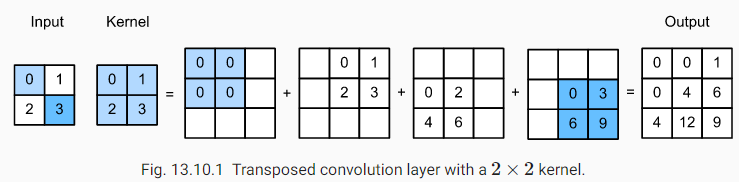